<a href="https://colab.research.google.com/github/mirnanoukari/ArUco-Pose-Detection/blob/main/intersection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

P11 = [1,1,1]
P12 = [0,0,0]

P21 = [0,1,1]
P22 = [1,0,0]
# l1 = P11[0]-P12[0]
# m1 = P11[1]-P12[1]
# n1 = P11[2]-P12[2]

# l2 = P21[0]-P22[0]
# m2 = P21[1]-P22[1]
# n2 = P21[2]-P22[2]



In [ ]:
import numpy as np

# def solve_eqns(x1, x2, y1, y2, z1, z2, l1, l2, m1, m2, n1, n2):
#   # Solve for t
#   t = (x2 + l2 - x1) / l1
#   # Solve for s
#   s = (y2 + m2 - y1 - m1 * t) / (n1 * t - n2)
#   return t, s

# def solve_eqns(x1, x2, y1, y2, z1, z2, l1, l2, m1, m2, n1, n2):
#     A = np.array([[l1, -l2], [m1, -m2, n1]])
#     B = np.array([x2 - x1, y2 - y1, z2 - z1])
#     X = np.linalg.solve(A, B)
#     return X[0], X[1]

def intersect_pnt(P11,P12,P21,P22):
  # Input values


  x1 = P11[0]
  x2 = P21[0]
  y1 = P11[1]
  y2 = P21[1]
  z1 = P11[2]
  z2 = P21[2]

  l1 = P12[0]-P11[0]
  m1 = P12[1]-P11[1]
  n1 = P12[2]-P11[2]

  l2 = P22[0]-P21[0]
  m2 = P22[1]-P21[1]
  n2 = P22[2]-P21[2]

  # Define the coefficient matrix and the constant vector
  A = np.array([[l1, -l2],
                [m1, -m2],
                [n1, -n2]])
  B = np.array([x2- x1, y2- y1, z2 - z1]).reshape(3,1)
  # Solve for t and s
  try:
    solution = np.linalg.pinv(A) @ B
    print(solution)
    # Extract the values of t and s
    t = solution[0]
    s = solution[1]

    # Print the solution
    print("The solution for t is: {}".format(t))
    print("The solution for s is: {}".format(s))

    L1 = [x1+l1*t, y1+m1*t, z1+n1*t]
    L2 = [x2+l2*s, y2+m2*s, z2+n2*s]
    if L2 - L1 == 0:
      print("Lines intersect")
  except :
    print("error")
    
intersect_pnt(P11,P12,P21,P22)  

[[0.5]
 [0.5]]
The solution for t is: [0.5]
The solution for s is: [0.5]
error


In [ ]:
def intersect_pnt(P11,P12,P21,P22):
  # Input values
  x1 = P11[0]
  x2 = P21[0]
  y1 = P11[1]
  y2 = P21[1]
  z1 = P11[2]
  z2 = P21[2]
  # direction vectors
  l1 = P12[0]-P11[0]
  m1 = P12[1]-P11[1]
  n1 = P12[2]-P11[2]

  l2 = P22[0]-P21[0]
  m2 = P22[1]-P21[1]
  n2 = P22[2]-P21[2]

  # Define the coefficient matrix and the constant vector
  A = np.array([[l1, -l2],
                [m1, -m2],
                [n1, -n2]])
  B = np.array([x2- x1, y2- y1, z2 - z1]).reshape(3,1)
  # Solve for t and s
  try:
    solution = np.linalg.pinv(A) @ B
    #print(solution)
    # Extract the values of t and s
    t = solution[0]
    s = solution[1]

    # Print the solution
    print("The solution for t is: {}".format(t))
    print("The solution for s is: {}".format(s))

    L1 = np.array([x1+l1*t, y1+m1*t, z1+n1*t])
    L2 = np.array([x2+l2*s, y2+m2*s, z2+n2*s])
    #print("intersection:", L1)

    #if L2 == L1:
    #  print("Lines intersect")
      
  except :
    print("error")

  return L1

intersect_pnt(P11,P12,P21,P22)  

The solution for t is: [0.5]
The solution for s is: [0.5]


array([[0.5],
       [0.5],
       [0.5]])

The solution for t is: [0.5]
The solution for s is: [0.5]


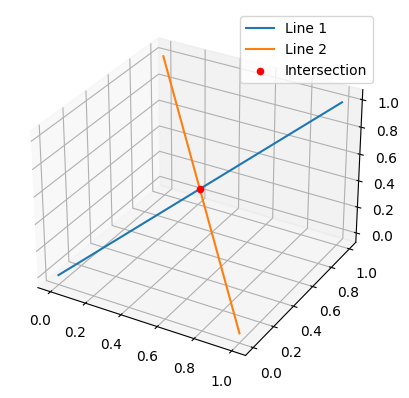

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the two lines
l1 = np.array([P11, P12])  # First line: two points
l2 = np.array([P21, P22])  # Second line: two points

# Find the intersection point

intersection = intersect_pnt(P11,P12,P21,P22)   

# Plot the lines and the intersection point
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(l1[:, 0], l1[:, 1], l1[:, 2], label='Line 1')
ax.plot(l2[:, 0], l2[:, 1], l2[:, 2], label='Line 2')
ax.scatter(intersection[0], intersection[1], intersection[2], marker='o', color='r', label='Intersection')
ax.legend()
plt.show()